In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns



In [2]:
df = pd.read_csv("Cln_data.csv")
df = df.iloc[:,1:]
df

#get rid of outliers in income and age columns
df2 = df.loc[df['Income'] < 300000]
X_test2 = df2.loc[df2['Age'] < 100]
X = X_test2
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,76.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0


In [3]:
#drop target response column
X = X.iloc[:,np.r_[0:23,24]]
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,76.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0


In [4]:
#initialize T to target column response
T = X_test2.iloc[:, 23]
T

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2235    0.0
2236    0.0
2237    0.0
2238    0.0
2239    1.0
Name: Response, Length: 2236, dtype: float64

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state = 1).fit(X)
kmeans.labels_

array([3, 0, 3, ..., 3, 3, 3], dtype=int32)

In [6]:
kmeans.cluster_centers_

array([[ 3.53070175e+00,  4.75146199e+00,  4.21882374e+04,
         6.72514620e-01,  6.54970760e-01,  4.97412281e+01,
         1.20282164e+02,  7.90497076e+00,  4.63084795e+01,
         1.29926901e+01,  8.47514620e+00,  2.74605263e+01,
         2.66812865e+00,  3.28070175e+00,  1.11549708e+00,
         4.15204678e+00,  6.36111111e+00,  8.33333333e-02,
         3.80116959e-02,  1.46198830e-03,  5.84795322e-03,
         5.84795322e-03,  1.16959064e-02,  5.34371345e+01],
       [ 3.45454545e+00,  4.75921376e+00,  8.27749902e+04,
         7.12530713e-02,  2.38329238e-01,  4.98353808e+01,
         6.55965602e+02,  6.45945946e+01,  4.71493857e+02,
         9.08280098e+01,  6.72972973e+01,  7.09778870e+01,
         1.27764128e+00,  5.25061425e+00,  5.99017199e+00,
         8.27027027e+00,  2.68550369e+00,  9.58230958e-02,
         1.59705160e-01,  3.39066339e-01,  2.70270270e-01,
         3.43980344e-02,  4.91400491e-03,  5.40393120e+01],
       [ 2.93562232e+00,  4.71673820e+00,  2.34568167e

In [7]:
## Evaluate 

from sklearn.metrics.cluster import rand_score, homogeneity_score, completeness_score
from sklearn.metrics import silhouette_score


scores = {'Rand Index': [rand_score(T,kmeans.labels_)],
    'Homogeneity': [homogeneity_score(T,kmeans.labels_)],
    'Completeness': [completeness_score(T,kmeans.labels_)],
    'Silhouette': [silhouette_score(X,kmeans.labels_)]
         }
# TODO 2.C
s = pd.DataFrame(scores)
s

,Rand Index,Homogeneity,Completeness,Silhouette
0,0.395423,0.048682,0.015079,0.529462


In [8]:
#create label numpy array 
label = kmeans.fit_predict(X)

In [9]:
#create label column in dataframe and add our label numpy array values to it
X['label'] = label.tolist()

In [10]:
#print out dataframe with label variable created
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,3
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,3
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,2
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,3
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,76.0,3
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0,3
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,3


In [11]:
#create label numpy array 
label = kmeans.fit_predict(X)

#create label column in dataframe and add our label numpy array values to it
X['label'] = label.tolist()

In [12]:
X.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Age', 'label'],
      dtype='object')

In [13]:
total_spent = X["MntWines"] + X["MntFruits"] + X["MntMeatProducts"] + X["MntFishProducts"] + X["MntSweetProducts"] + X["MntGoldProds"]
X["total_spent"] = total_spent
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label,total_spent
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,3,1617.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0,27.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,3,776.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,2,53.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,3,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,3,1341.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,76.0,3,444.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0,3,1241.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,3,843.0


In [14]:
total_kids = X["Kidhome"] + X["Teenhome"]
X["total_num_kids"] = total_kids
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label,total_spent,total_num_kids
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,65.0,3,1617.0,0.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0,27.0,2.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,57.0,3,776.0,0.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38.0,2,53.0,1.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41.0,3,422.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,55.0,3,1341.0,1.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,76.0,3,444.0,3.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,0.0,1.0,0.0,0.0,0.0,0.0,41.0,3,1241.0,0.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,66.0,3,843.0,1.0


In [15]:
X["Response"] = T.tolist()
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label,total_spent,total_num_kids,Response
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,0.0,65.0,3,1617.0,0.0,1.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,68.0,0,27.0,2.0,0.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,57.0,3,776.0,0.0,0.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,38.0,2,53.0,1.0,0.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,0.0,0.0,41.0,3,422.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,0.0,0.0,55.0,3,1341.0,1.0,0.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0.0,0.0,1.0,0.0,0.0,76.0,3,444.0,3.0,0.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,1.0,0.0,0.0,0.0,0.0,41.0,3,1241.0,0.0,0.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0.0,0.0,0.0,0.0,0.0,66.0,3,843.0,1.0,0.0


In [16]:
filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
filtered_label2 = X[label == 2]
filtered_label3 = X[label == 3]

In [17]:
filtered_label0

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label,total_spent,total_num_kids,Response
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,68.0,0,27.0,2.0,0.0
7,5.0,4.0,33454.0,1.0,0.0,32.0,76.0,10.0,56.0,3.0,...,0.0,0.0,0.0,0.0,0.0,37.0,0,169.0,1.0,0.0
16,3.0,4.0,41850.0,1.0,1.0,51.0,53.0,5.0,19.0,2.0,...,0.0,0.0,0.0,0.0,0.0,42.0,0,96.0,2.0,0.0
17,3.0,6.0,37760.0,0.0,0.0,20.0,84.0,5.0,38.0,150.0,...,0.0,0.0,0.0,0.0,0.0,76.0,0,317.0,0.0,0.0
19,1.0,5.0,33812.0,1.0,0.0,86.0,4.0,17.0,19.0,30.0,...,0.0,0.0,0.0,0.0,0.0,37.0,0,133.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,3.0,6.0,36807.0,1.0,1.0,88.0,4.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,68.0,0,16.0,2.0,0.0
2219,4.0,6.0,40101.0,1.0,0.0,73.0,171.0,3.0,129.0,26.0,...,0.0,0.0,0.0,0.0,0.0,37.0,0,415.0,1.0,0.0
2223,4.0,4.0,33562.0,1.0,2.0,33.0,21.0,12.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,0,51.0,3.0,0.0
2231,4.0,5.0,44802.0,0.0,0.0,71.0,853.0,10.0,143.0,13.0,...,0.0,0.0,0.0,0.0,0.0,52.0,0,1049.0,0.0,0.0


In [18]:
filtered_label1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label,total_spent,total_num_kids,Response
15,5.0,5.0,82800.0,0.0,0.0,23.0,1006.0,22.0,115.0,59.0,...,0.0,1.0,1.0,0.0,0.0,76.0,1,1315.0,0.0,1.0
18,4.0,4.0,76995.0,0.0,1.0,91.0,1012.0,80.0,498.0,0.0,...,0.0,0.0,1.0,0.0,0.0,73.0,1,1782.0,1.0,0.0
29,5.0,4.0,84618.0,0.0,0.0,96.0,684.0,100.0,801.0,21.0,...,0.0,1.0,0.0,0.0,0.0,57.0,1,1672.0,0.0,0.0
40,3.0,4.0,80011.0,0.0,1.0,3.0,421.0,76.0,536.0,82.0,...,0.0,0.0,0.0,0.0,0.0,42.0,1,1395.0,1.0,0.0
45,3.0,5.0,79941.0,0.0,0.0,72.0,123.0,164.0,266.0,227.0,...,0.0,0.0,0.0,0.0,0.0,46.0,1,984.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,3.0,6.0,88325.0,0.0,0.0,42.0,519.0,71.0,860.0,93.0,...,0.0,0.0,0.0,0.0,0.0,41.0,1,1623.0,0.0,0.0
2213,1.0,5.0,80617.0,0.0,0.0,42.0,594.0,51.0,631.0,72.0,...,0.0,0.0,0.0,0.0,0.0,27.0,1,1435.0,0.0,0.0
2217,5.0,7.0,82032.0,0.0,0.0,54.0,332.0,194.0,377.0,149.0,...,0.0,0.0,0.0,0.0,0.0,74.0,1,1234.0,0.0,0.0
2221,4.0,5.0,75777.0,0.0,0.0,12.0,712.0,26.0,538.0,69.0,...,1.0,1.0,0.0,0.0,0.0,40.0,1,1438.0,0.0,1.0


In [19]:
filtered_label2

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label,total_spent,total_num_kids,Response
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,38.0,2,53.0,1.0,0.0
8,5.0,6.0,30351.0,1.0,0.0,19.0,14.0,0.0,24.0,3.0,...,0.0,0.0,0.0,0.0,0.0,48.0,2,46.0,1.0,1.0
9,5.0,6.0,5648.0,1.0,1.0,68.0,28.0,0.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,72.0,2,49.0,2.0,0.0
10,3.0,4.0,28314.4,1.0,0.0,11.0,5.0,5.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.0,2,19.0,1.0,0.0
11,2.0,4.0,7500.0,0.0,0.0,59.0,6.0,16.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,46.0,2,61.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,3.0,6.0,22775.0,1.0,0.0,40.0,5.0,1.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,44.0,2,15.0,1.0,0.0
2222,1.0,6.0,7500.0,1.0,0.0,7.0,2.0,8.0,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,43.0,2,53.0,1.0,0.0
2229,3.0,4.0,24434.0,2.0,0.0,9.0,3.0,2.0,8.0,20.0,...,0.0,0.0,0.0,0.0,0.0,50.0,2,50.0,2.0,0.0
2230,3.0,5.0,11012.0,1.0,0.0,82.0,24.0,3.0,26.0,7.0,...,0.0,0.0,0.0,0.0,0.0,38.0,2,84.0,1.0,0.0


In [20]:
filtered_label3

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,label,total_spent,total_num_kids,Response
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,0.0,65.0,3,1617.0,0.0,1.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,57.0,3,776.0,0.0,0.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,0.0,0.0,41.0,3,422.0,1.0,0.0
5,4.0,6.0,62513.0,0.0,1.0,16.0,520.0,42.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,55.0,3,716.0,1.0,0.0
6,3.0,3.0,55635.0,0.0,1.0,34.0,235.0,65.0,164.0,50.0,...,0.0,0.0,0.0,0.0,0.0,51.0,3,590.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,0.0,0.0,55.0,3,1341.0,1.0,0.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0.0,0.0,1.0,0.0,0.0,76.0,3,444.0,3.0,0.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,1.0,0.0,0.0,0.0,0.0,41.0,3,1241.0,0.0,0.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0.0,0.0,0.0,0.0,0.0,66.0,3,843.0,1.0,0.0


# Find total responses between clusters

In [21]:
label0_total_responses = np.sum(filtered_label0["Response"])
label0_total_responses

81.0

In [22]:
label1_total_responses = np.sum(filtered_label1["Response"])
label1_total_responses

128.0

In [23]:
label2_total_responses = np.sum(filtered_label2["Response"])
label2_total_responses

48.0

In [24]:
label3_total_responses = np.sum(filtered_label3["Response"])
label3_total_responses

77.0

# Find average number of kids between clusters

In [25]:
label0_avg_kids = np.mean(filtered_label0["total_num_kids"])
label0_avg_kids

1.327485380116959

In [26]:
label1_avg_kids = np.mean(filtered_label1["total_num_kids"])
label1_avg_kids

0.3095823095823096

In [27]:
label2_avg_kids = np.mean(filtered_label2["total_num_kids"])
label2_avg_kids

0.9935622317596566

In [28]:
label3_avg_kids = np.mean(filtered_label3["total_num_kids"])
label3_avg_kids

0.9263622974963182

# Find average age of customers between clusters

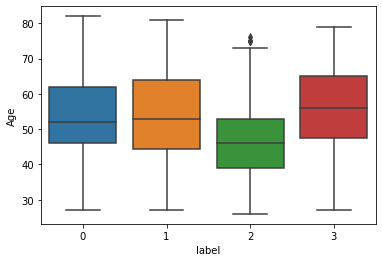

In [29]:
p = sns.boxplot(x = X["label"], y = X["Age"])

In [30]:
label0_avg_age = np.mean(filtered_label0["Age"])
label0_avg_age

53.437134502923975

In [31]:
label1_avg_age = np.mean(filtered_label1["Age"])
label1_avg_age

54.03931203931204

In [32]:
label2_avg_age = np.mean(filtered_label2["Age"])
label2_avg_age

47.59442060085837

In [33]:
label3_avg_age = np.mean(filtered_label3["Age"])
label3_avg_age

55.982326951399116

# Plot average income between clusters

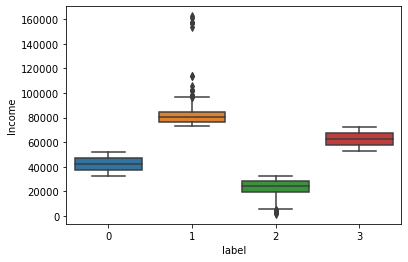

In [34]:
p = sns.boxplot(x = X["label"], y = X["Income"])

# Plot average total spent between clusters

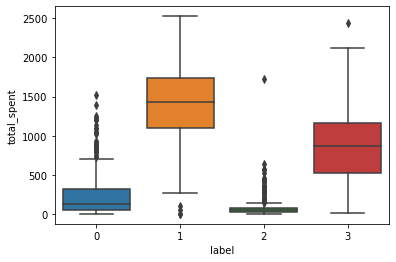

In [35]:
p = sns.boxplot(x = X["label"], y = X["total_spent"])

# Plot average number of kids between clusters

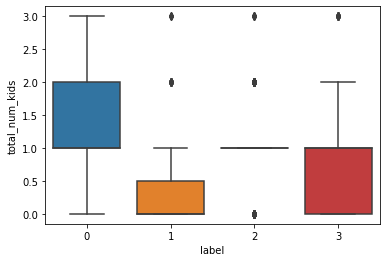

In [36]:
p = sns.boxplot(x = X["label"], y = X["total_num_kids"])

In [37]:
#Getting unique labels
 
u_labels = np.unique(label)

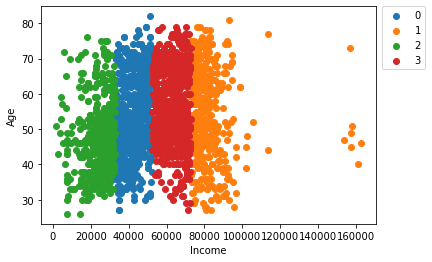

In [38]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 23] , label = i)
    
plt.xlabel("Income")
plt.ylabel("Age")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

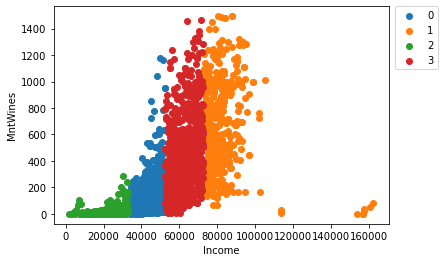

In [39]:
#plotting the results to show clusters between income and amount spent on wine:
 
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 6] , label = i)
    
plt.xlabel("Income")
plt.ylabel("MntWines")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [40]:
u_labels

array([0, 1, 2, 3], dtype=int32)

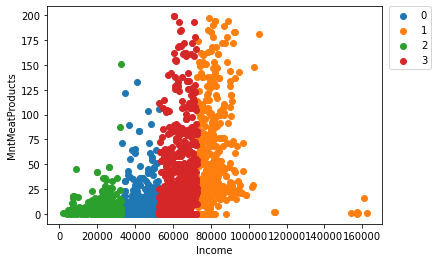

In [41]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 7] , label = i)
    
plt.xlabel("Income")
plt.ylabel("MntMeatProducts")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

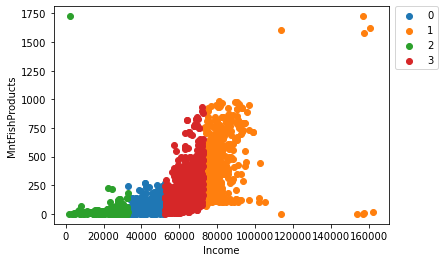

In [42]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 8] , label = i)
    
plt.xlabel("Income")
plt.ylabel("MntFishProducts")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

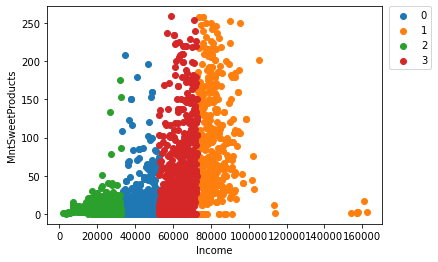

In [43]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 9] , label = i)
    
plt.xlabel("Income")
plt.ylabel("MntSweetProducts")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

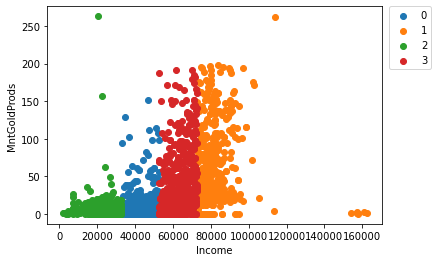

In [44]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 10] , label = i)
    
plt.xlabel("Income")
plt.ylabel("MntGoldProds")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

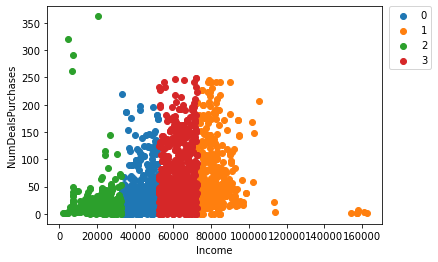

In [45]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 11] , label = i)
    
plt.xlabel("Income")
plt.ylabel("NumDealsPurchases")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

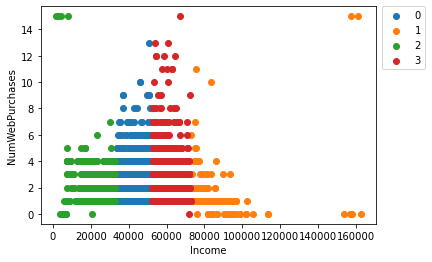

In [46]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 12] , label = i)
    
plt.xlabel("Income")
plt.ylabel("NumWebPurchases")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

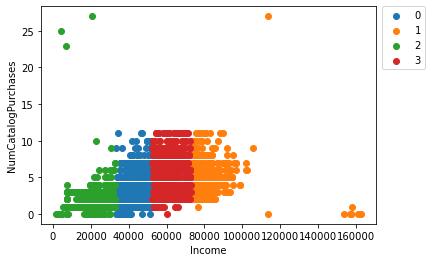

In [47]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 13] , label = i)
    
plt.xlabel("Income")
plt.ylabel("NumCatalogPurchases")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

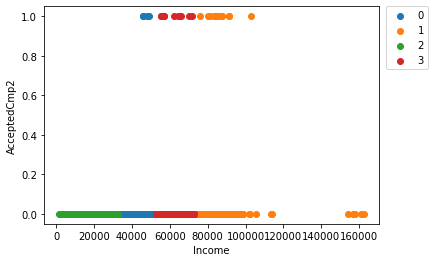

In [48]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 21] , label = i)
    
plt.xlabel("Income")
plt.ylabel("AcceptedCmp2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

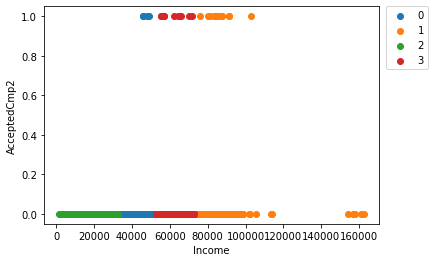

In [49]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 21] , label = i)
    
plt.xlabel("Income")
plt.ylabel("AcceptedCmp2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

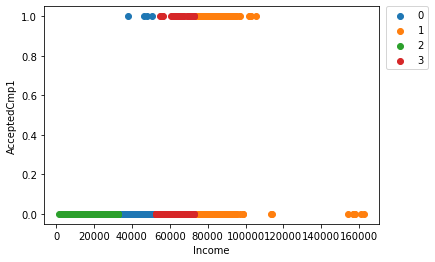

In [50]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 20] , label = i)
    
plt.xlabel("Income")
plt.ylabel("AcceptedCmp1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [51]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

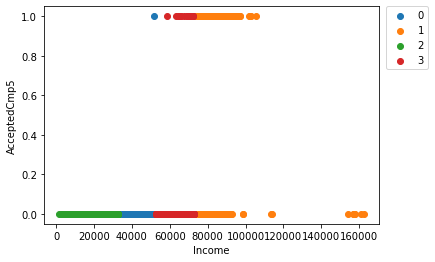

In [52]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 19] , label = i)
    
plt.xlabel("Income")
plt.ylabel("AcceptedCmp5")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

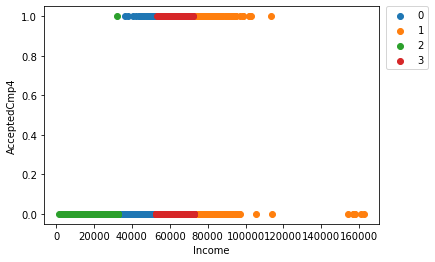

In [53]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 18] , label = i)
    
plt.xlabel("Income")
plt.ylabel("AcceptedCmp4")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

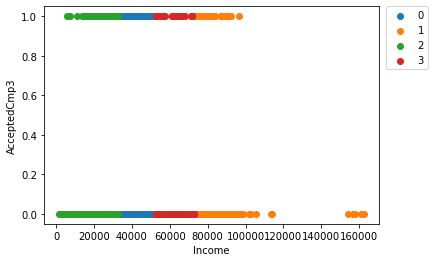

In [54]:
for i in u_labels:
    plt.scatter(X.iloc[label == i, 2] , X.iloc[label == i, 17] , label = i)
    
plt.xlabel("Income")
plt.ylabel("AcceptedCmp3")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# Plots showing how many customers responded to offers by cluster

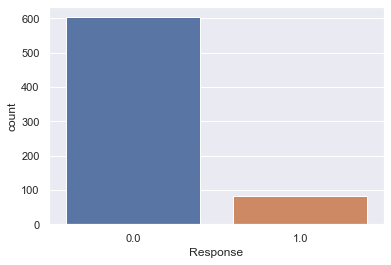

In [55]:
sns.set(style="darkgrid")
ax = sns.countplot(x = filtered_label0["Response"])

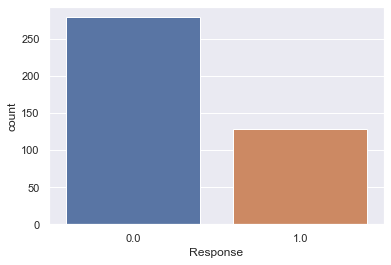

In [56]:
sns.set(style="darkgrid")
ax = sns.countplot(x = filtered_label1["Response"])

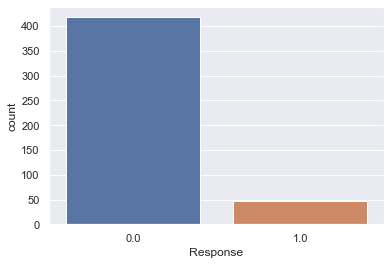

In [57]:
sns.set(style="darkgrid")
ax = sns.countplot(x = filtered_label2["Response"])

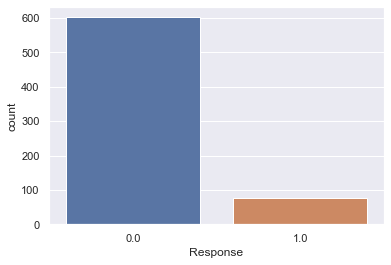

In [58]:
sns.set(style="darkgrid")
ax = sns.countplot(x = filtered_label3["Response"])

Text(0.5, 0, 'Cluster')

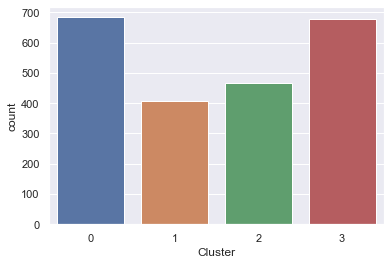

In [62]:
sns.set(style="darkgrid")
ax = sns.countplot(x = X["label"])
ax.set_xlabel("Cluster")

# Cluster Profiling

Cluster 0:
- Second youngest group of customers (53 years old)
- Second lowest annual income among all clusters
- Second lowest total amount spent
- Largest number of customers among all clusters (684)
- Has the most kids on average
- Second highest response rate to offers

Cluster 1:
- Second oldest group of customers (roughly 54 years old)
- Highest annual income among all clusters
- Highest total amount spent
- Smallest number of customers among all clusters (407)
- Second lowest number of kids on average
- Highest response rate to offers

Cluster 2:
- Youngest group of customers (average age of 47 years old)
- Lowest annual income among clusters
- Lowest total amount spent
- Second smallest number of customers among all clusters (466)
- Lowest number of kids on average
- Lowest response rate to offers

Cluster 3:
- Oldest group of customers (average age of 56 years old)
- Second highest average annual income
- Second highest total amount spent
- Second largest number of customers among all clusters (679)
- Second highest number of kids on average
- Second lowest response rate to offers

# Key Takeaways from Clustering

- Target older customers - particularly people that are 54 years or older
- Target customers with a higher annual income since they have the highest response rate to offers